## Data Gathering
This section includes that steps that I am going to take to gather the data needed for the analysis. The goal is to have the data ready for data assessing afterwards.

At the end of this section, there will be three dataframes for further analysis:
1. WeRateDogs Twitter archive
2. Tweet image predictions
3. Tweet JSON

In [1]:
### Load the packages that are necessary for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import requests
import os
import tweepy
import json
from tqdm import tqdm

sns.set_style('darkgrid')
st.chisqprob = lambda chisq, df_master_queried: st.chi2.sf(chisq, df_master_queried)

%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
### Create directories for gathered data and cleaned data

folders = ['gathered_data', 'cleaned_data']

for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
### Load up the Twitter Archive Enhanced data

# create a dataframe for the data
df_twt_arch = pd.read_csv(os.path.join(folders[0], 'twitter-archive-enhanced.csv'))

In [4]:
### Gather the Twitter image predictions programmatically

# the url for retrieving the Twitter image predictions file
twt_img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# instantiate a response variable
response = requests.get(twt_img_url)

# open the file which will write the content of the response variable to
with open(os.path.join(folders[0], twt_img_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
### Load up the Twitter Image Predictions data

# create a dataframe for the data
df_img_pred = pd.read_csv(os.path.join(folders[0], 'image-predictions.tsv'), sep='\t')

In [6]:
### Construct API to retrieve relevant tweets

# API credentials
consumer_key = 'Mr0LgCpxVUS5wq2psLubbqWzH'
consumer_secret = 'HPfPiWG0f0pbjRM9JDFTWaOpN958yK26V7V60JAt19W5tdDD5p'
access_token = '847637417305620480-e62DbePxJQb0TpKmQypOzy9aU5QKTIF'
access_secret = 'YOXvvTwgElstCpF1uhWn8ATRCZxPKCVlLgbJiYrnqS9A6'

# instantiate authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# instantiate API object and enable the JSON parser for serialization
api = tweepy.API(auth, 
                 parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
### Query the Twitter API for each tweet's JSON data

# create a dictionary to store the JSON data
tweet_data = {}

# a loop based on the Tweet ID in the Twitter Archive Enhanced dataframe
for tweet in tqdm(df_twt_arch.tweet_id):
    try:
        tweet_status = api.get_status(tweet, tweet_mode='extended')
        tweet_data[str(tweet)] = tweet_status
    except: 
        print('ID missing: {}'.format(str(tweet)))

  1%|          | 20/2356 [00:11<22:31,  1.73it/s]

ID missing: 888202515573088257


  4%|▍         | 96/2356 [00:56<22:09,  1.70it/s]

ID missing: 873697596434513921


  5%|▌         | 119/2356 [01:10<22:00,  1.69it/s]

ID missing: 869988702071779329


  6%|▌         | 133/2356 [01:17<21:42,  1.71it/s]

ID missing: 866816280283807744


  7%|▋         | 156/2356 [01:32<21:38,  1.69it/s]

ID missing: 861769973181624320


 11%|█         | 261/2356 [02:36<20:54,  1.67it/s]

ID missing: 842892208864923648


 16%|█▋        | 383/2356 [03:48<19:38,  1.67it/s]

ID missing: 827228250799742977


 24%|██▍       | 567/2356 [05:36<17:42,  1.68it/s]

ID missing: 802247111496568832


 33%|███▎      | 785/2356 [07:46<15:34,  1.68it/s]

ID missing: 775096608509886464


 38%|███▊      | 900/2356 [08:55<14:26,  1.68it/s]

Rate limit reached. Sleeping for: 364


 75%|███████▍  | 1759/2356 [43:43<14:50,  1.49s/it]

ID missing: 678755239630127104


100%|██████████| 2356/2356 [1:14:27<00:00,  1.90s/it]


In [8]:
### Create a file to store the entire set of the queried JSON data

# open the file which will write the JSON data of the dictionary to
with open(os.path.join(folders[0], 'tweet_json.txt'), 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [9]:
### Load up the queried API JSON data

# create a dataframe for the data
df_twt_json = pd.read_json(os.path.join(folders[0], 'tweet_json.txt'), orient='index')

# write out to a CSV file
df_twt_json.to_csv(os.path.join(folders[0], 'tweet_json.csv'), index=False)

The three dataframes for assessing are ready:
1. WeRateDogs Twitter archive - `df_twt_arch`
2. Tweet image predictions - `df_img_pred`
3. Tweet JSON - `df_twt_json`

## Data Assessing
This section includes the steps that I am going to take to assess the gathered data. The goal is to summarize the quality and tidiness issues which will then be tackled afterwards.

Let's start with the Twitter Archive Enhanced data.

In [10]:
# info check
df_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# spot check by sampling
df_twt_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705...,10,10,Derek,None,None,pupper,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
288,838476387338051585,NaN,NaN,2017-03-05 19:48:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,None,None,None,None
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
1822,676575501977128964,NaN,NaN,2015-12-15 01:32:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is very passionate about Christmas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676575501...,8,10,None,None,None,pupper,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
1471,693993230313091072,NaN,NaN,2016-02-01 03:04:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",These lil fellas are the best of friends. 12/1...,NaN,NaN,NaN,https://vine.co/v/i5ETazP5hrm,12,10,None,None,None,None,None
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,None,None,pupper,None
2062,671163268581498880,NaN,NaN,2015-11-30 03:06:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671163268...,8,10,None,None,None,None,None


In [12]:
# check the dog name column on legitimacy
df_twt_arch.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
Bailey         7
an             7
Bella          6
Jack           6
Dave           6
Rusty          6
Scout          6
Stanley        6
Leo            6
Jax            6
Koda           6
Oscar          6
Milo           6
very           5
            ... 
Ralphson       1
Schnitzel      1
Millie         1
Franq          1
Kellogg        1
Eriq           1
Shnuggles      1
Tom            1
Aja            1
Kanu           1
Alexander      1
Chuq           1
Cuddles        1
Banjo          1
Edmund         1
Bobbay         1
Spencer        1
Buddah         1
Terrenth       1
Severus        1
Jeremy         1
Gunner         1
Jessifer       1
Mauve          1
O              1
Geno           1
Snoop          1
Trigger       

In [13]:
# check on duplicates
df_twt_arch.duplicated().sum()

0

In [14]:
# info check
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# spot check by sampling
df_img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
778,689877686181715968,https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg,1,Old_English_sheepdog,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
646,681654059175129088,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538,True,chow,0.146892,True,Pekinese,0.037613,True
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [16]:
# check on duplicates
df_img_pred.duplicated().sum()

0

In [17]:
# info check
df_twt_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
display_text_range               2346 non-null object
entities                         2346 non-null object
extended_entities                2069 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
full_text                        2346 non-null object
geo                              0 non-null float64
id                               2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              

In [18]:
# spot check by sampling
df_twt_json.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1993-01-30 16:06:00.103686147,NaN,NaN,2016-05-06 02:24:02,"[0, 115]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/5i...,5301,0,This is Wallace. He's a skater pup. He said se...,NaN,...,0.0,NaN,NaN,NaN,2231,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1997-04-04 18:13:13.139703809,NaN,NaN,2017-05-04 17:01:34,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,NaN,...,NaN,NaN,NaN,NaN,32825,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-11-08 11:17:36.876867584,NaN,NaN,2016-01-20 00:03:21,"[0, 102]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/TR...,12610,0,Here we see 33 dogs posing for a picture. All ...,NaN,...,0.0,NaN,NaN,NaN,6151,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-20 01:16:41.033924608,NaN,NaN,2015-11-18 16:12:51,"[0, 76]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/bA...,464,0,This is Klevin. He laughs a lot. Very cool dog...,NaN,...,0.0,NaN,NaN,NaN,236,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-05-04 11:17:59.178194945,NaN,NaN,2015-12-06 04:18:46,"[0, 134]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/0z...,1573,0,This is Koda. She's a boss. Helps shift gears....,NaN,...,0.0,NaN,NaN,NaN,643,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-04-11 20:20:31.394082816,NaN,NaN,2016-05-23 01:40:38,"[0, 110]","{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,1621,0,When your friend is turnt af and you're just t...,NaN,...,0.0,NaN,NaN,NaN,443,0,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-25 11:50:07.010385924,NaN,NaN,2016-03-21 23:55:01,"[0, 138]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/o2...,2427,0,This is Chester. He's clearly in charge of the...,NaN,...,0.0,NaN,NaN,NaN,695,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1996-12-11 19:46:07.704068097,NaN,NaN,2017-04-07 13:04:55,"[12, 136]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,3607,0,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,...,NaN,NaN,NaN,NaN,363,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1997-08-29 02:11:23.541237760,NaN,NaN,2017-06-08 14:20:41,"[0, 140]","{'hashtags': [{'indices': [21, 43], 'text': 'd...",{'media': [{'display_url': 'pic.twitter.com/17...,14893,0,Here are my favorite #dogsatpollingstations \n...,NaN,...,0.0,NaN,NaN,NaN,3815,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 16:28:07.569522689,NaN,NaN,2016-07-13 18:26:16,"[0, 75]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/sT...,3711,0,This is Ace. He's a window washer. One of the ...,NaN,...,0.0,NaN,NaN,NaN,1169,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


## Issues Summary

### Quality Issues:
Twitter Archive Enhanced data - `df_twt_arch`
1. 181 observations of retweets are found
2. 59 observations of missing expanded url (NaN)
3. Inapproproiate datatypes for timestamp and dog stages
4. Erroneous dog names (a, an, the etc.)
5. Inappropriate string representation of missing dog names ('None')
6. Redundant column (Denominator), given the fact that the rating is on a out-of-10 scale

Image Predictions data - `df_img_pred`
1. Inappropriate datatype for dog breed (all p columns)
2. Letters inconsistency in which words sometimes start with lower case letter/ upper case

Tweet JSON data - `df_twt_json`
1. 172 observations of retweets are found
2. Unclear/ confusing column naming (eg. id)
3. Redundant columns are included (May depend on what sort of analyses need to be performed)

### Tidiness Issues:
Twitter Archive Enhanced data - `df_twt_arch`
1. Dog stages as a single variable (Categorical) are represented by four separate columns

Image Predictions data - `df_img_pred`
1. Image URLs, predictions, and results should be part of the archive data

Tweet JSON data - `df_twt_json`
1. Retweet and favorite count should be part of the archive data
2. Text column duplicated in the archive data

Now we have the issues pinpointed, and we are ready to clean the data.

## Data Cleaning
This section includes the steps that I am going to take to clean the data based on the issues summary. The goal is to have the data trimmed and tailored for further analysis.

At the end of this section, there will be a well consolidated dataframe.

Let's start by making a copy of the dataframes; so we could always check back/ retrace afterwards.

In [19]:
### Create copies for dataframes

df_ta_clean = df_twt_arch.copy()

df_ip_clean = df_img_pred.copy()

df_tj_clean = df_twt_json.copy()

### Quality Issues 

##### 1. Observations of retweets in `df_ta_clean` and `df_tj_clean`.

#### Define
Exclude all observations of retweets

#### Code

In [20]:
### Exclude non-original ratings in the archieve data and the json data

df_ta_clean = df_ta_clean[df_ta_clean.retweeted_status_id.isnull()]

df_tj_clean = df_tj_clean[df_tj_clean.retweeted_status.isnull()]

#### Test

In [21]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [22]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
full_text                        2174 non-null object
geo                              0 non-null float64
id                               2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              

##### 2. Missing expanded urls in `df_ta_clean`

#### Define
Exclude the observations with missing urls

#### Code

In [23]:
df_ta_clean = df_ta_clean[df_ta_clean.expanded_urls.notnull()]

#### Test

In [24]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

##### 3. Inappropriate data types in `df_ta_clean`

#### Define
1. Change timestamp to datetime data type in `df_ta_clean`
2. Change dog stages to categorical data type in `df_ta_clean`

#### Code

In [25]:
df_ta_clean.timestamp = pd.to_datetime(df_ta_clean.timestamp)

In [26]:
for col in list(df_ta_clean.columns[-4:]):
    df_ta_clean[col] = df_ta_clean[col].astype('category')

#### Test

In [27]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null category
floofer                       2117 non-null category
pupper                        2117 non-null category
puppo                         2117 non-null category
dtypes: category(4), d

##### 4. Erroneous dog names and inappropriate representations in `df_ta_clean`

#### Define
Replace 'None' and names that do not make sense (a, an, the etc.) with NaN values

#### Code

In [28]:
no_name = ['None', 'a', 'an', 'the', 'quite']

df_ta_clean.name = df_ta_clean.name.replace(no_name, np.nan)

#### Test

In [29]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1423 non-null object
doggo                         2117 non-null category
floofer                       2117 non-null category
pupper                        2117 non-null category
puppo                         2117 non-null category
dtypes: category(4), d

##### 5. Letters inconsistency and inappropriate data type for dog breed in `df_ip_clean`

#### Define
1. Turn all predictions to lower case for consistency
2. Change p1, p2, and p3 to categorical data

#### Code

In [30]:
for col in list(('p1', 'p2', 'p3')):
    df_ip_clean[col] = df_ip_clean[col].str.lower()
    df_ip_clean[col] = df_ip_clean[col].astype('category')

#### Test

In [31]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


In [32]:
df_ip_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### 6. Condusing column name in `df_tj_clean`

#### Define
Rename the id column to tweet_id for clarification

#### Code

In [33]:
df_tj_clean = df_tj_clean.rename(index=str, columns={'id': 'tweet_id'})

#### Test

In [34]:
df_tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
full_text                        2174 non-null object
geo                              0 non-null float64
tweet_id                         2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-n

##### 7. Redundant denominator column in `df_ta_clean`

#### Define
Drop the denominator column

#### Code

In [35]:
df_ta_clean = df_ta_clean.drop(['rating_denominator'], axis=1)

#### Test

In [36]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
name                          1423 non-null object
doggo                         2117 non-null category
floofer                       2117 non-null category
pupper                        2117 non-null category
puppo                         2117 non-null category
dtypes: category(4), datetime64[ns](1), float64(4), int64(2), object(5)


##### 8. Redundant id_str column in `df_tj_clean`

#### Define
Since there are just a few columns that we need in `df_tj_clean` for further analysis, we can deal with this issue when tackling the tidiness issue in a bit.

### Tidiness Issues

##### 1. Dog stages as a single variable (Categorical) are represented by four separate columns in `df_ta_clean`

#### Define
Melt multiple columns into one

#### Code

In [37]:
def dog_stage(obs):
    if obs['doggo'] == 'doggo':
        return 'doggo'
    elif obs['floofer'] == 'floofer':
        return 'floofer'
    elif obs['pupper'] == 'pupper':
        return 'pupper'
    elif obs['puppo'] == 'puppo':
        return 'puppo'
    else:
        return 'unclassified'

In [38]:
df_ta_clean['dog_stage'] = df_ta_clean.apply(dog_stage, axis=1)

#### Test

In [39]:
df_ta_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,unclassified
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,unclassified
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,unclassified
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,unclassified
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,unclassified


##### 2. Columns are misarranged and duplicated ones exist

#### Define
1. Subset relevant columns from `df_ip_clean` and `df_tj_clean`
2. Merge subsets with `df_ta_clean`

#### Code

In [40]:
sub_df_ip_clean = df_ip_clean.drop(['img_num'], axis=1)

In [41]:
sub_df_tj_clean = df_tj_clean[['tweet_id', 'favorite_count', 'retweet_count']]

In [42]:
merged_ip_tj_df = pd.merge(sub_df_ip_clean, 
                          sub_df_tj_clean, 
                          on=['tweet_id'], 
                          how='inner')

In [43]:
df_master = pd.merge(df_ta_clean, 
                    merged_ip_tj_df, 
                    on=['tweet_id'], 
                    how='inner')

#### Test

In [44]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 29 columns):
tweet_id                      1299 non-null int64
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     1299 non-null datetime64[ns]
source                        1299 non-null object
text                          1299 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1299 non-null object
rating_numerator              1299 non-null int64
name                          878 non-null object
doggo                         1299 non-null category
floofer                       1299 non-null category
pupper                        1299 non-null category
puppo                         1299 non-null category
dog_stage                     1299 non-null object
jpg_url               

##### 3. Drop redundant columns that are not necessary for further analysis and final refinements

#### Define
For the `df_master` dataframe
1. Drop all retweet status columns
2. Drop all individual dog stage columns
3. Drop all 'in_reply' columns
4. Rename 'rating_numerator' column to 'rating'

#### Code

In [45]:
retweet_cols = list(df_master.columns[1:3])
reply_cols = list(df_master.columns[6:9])
ind_dog_cols = list(df_master.columns[12:16])

drop_list = retweet_cols + reply_cols + ind_dog_cols

In [46]:
drop_list

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [47]:
df_master = df_master.drop(drop_list, axis=1)

In [48]:
df_master = df_master.rename(index=str, columns={'rating_numerator': 'rating'})

#### Test

In [49]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1298
Data columns (total 20 columns):
tweet_id          1299 non-null int64
timestamp         1299 non-null datetime64[ns]
source            1299 non-null object
text              1299 non-null object
expanded_urls     1299 non-null object
rating            1299 non-null int64
name              878 non-null object
dog_stage         1299 non-null object
jpg_url           1299 non-null object
p1                1299 non-null category
p1_conf           1299 non-null float64
p1_dog            1299 non-null bool
p2                1299 non-null category
p2_conf           1299 non-null float64
p2_dog            1299 non-null bool
p3                1299 non-null category
p3_conf           1299 non-null float64
p3_dog            1299 non-null bool
favorite_count    1299 non-null int64
retweet_count     1299 non-null int64
dtypes: bool(3), category(3), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 222.9+ KB


In [50]:
df_master.to_csv(os.path.join(folders[1], 'twitter_archive_master.csv'), index=False)

## Explore and Investigate

In this last section, I am going to explore and investigate the cleaned dataset. There are three questions I want to address:
1. What are the most often predictions of the neural network algorithm?
2. Does the rating have any impact on social virality? That is, how influencial is WeRateDogs?
3. What are the dog stages that receive higher rating? And does certain stage have advantages over others?

##### 1. What are the most often predictions of the neural network algorithm?

In [51]:
df_master = pd.read_csv(os.path.join(folders[1], 'twitter_archive_master.csv'))

In [52]:
df_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,unclassified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25276,4248
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,unclassified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42526,8809
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,unclassified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,40691,9591


In [53]:
df_master.p1.value_counts().head()

golden_retriever      95
pembroke              65
labrador_retriever    62
chihuahua             45
pug                   39
Name: p1, dtype: int64

In [54]:
df_master.p2.value_counts().head()

labrador_retriever    61
golden_retriever      54
cardigan              53
chihuahua             31
french_bulldog        28
Name: p2, dtype: int64

In [55]:
df_master.p3.value_counts().head()

labrador_retriever    56
chihuahua             41
golden_retriever      33
chow                  25
eskimo_dog            25
Name: p3, dtype: int64

We can see among the algorithm's 3 predictions, Golden Retriever, Labrador Retriever, and Chihuahua show up most often.

I wonder how confident the algorithm is when making these predictions. Since p1_conf is the algorithm's most confident guess, we might as well only infer this column. Let's get the average confidence of each breed.

In [56]:
gr_conf_mean = df_master[df_master['p1'] == 'golden_retriever'].p1_conf.mean()

lr_conf_mean = df_master[df_master['p1'] == 'labrador_retriever'].p1_conf.mean()

chh_conf_mean = df_master[df_master['p1'] == 'chihuahua'].p1_conf.mean()

print(gr_conf_mean, lr_conf_mean, chh_conf_mean)

0.7099198842105264 0.6477795967741936 0.5972593999999999


Interestingly, the algorithm seems to be more confident towards predicting Golden Retriever. More or less, this could imply that the algorithm performs better when it is shown a Golden Retriever image.

##### 2. Does the rating have any impact on social virality? How influencial is WeRateDogs?

The Twitter account is devoted to humorously reviewing pictures of dogs doing adorable poses, often giving them scores above 10/10. In other words, the ceiling of the scale could be interpreted as a threshold, which separates the ridiculously humorous ones from the regular ones.

I'd like to investigate this from a binomial perspective, in which there are only two kinds of ratings:
1. Rating < 10
2. Rating >= 10

And I am going to see how they draw social attention differently.

In [57]:
### A copy for modelling

df_master_model = df_master.copy()

In [58]:
# create an intercept for modelling
df_master_model['intercept'] = 1

In [59]:
# create a column that stores binary values based on rating
df_master_model['perfect_10'] = np.where(df_master_model.eval('rating >= 10'), 1, 0)

In [60]:
# sanity check
df_master_model.perfect_10.value_counts()

1    1028
0     271
Name: perfect_10, dtype: int64

At first glance, we can already tell this so-called out-of-10 scale is not the common kind that we would normally expect/ interpret. Observations mainly fall in two categories, and most of them are given a rating of 10 or above.

Now let's be probabilistic and see if there is indeed a difference.

In [61]:
### Linear Regression - Retweet count as response variable

lm1 = sm.OLS(df_master_model['retweet_count'], 
            df_master_model[['intercept', 'favorite_count', 'perfect_10']])
results = lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     3723.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:53:00   Log-Likelihood:                -11406.
No. Observations:                1299   AIC:                         2.282e+04
Df Residuals:                    1296   BIC:                         2.283e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         67.3420     96.343      0.699      0.485    -121.664     256.348
favorite_count     0.3306      0.004     84.276      0.000       0.323       0.338
perfect_10      -336.3016    111.114     -3.027      0.003    -554.284    -118.319
==============================================================================
Omnibus:                     1077.150   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89947.049
Skew:                           3.287   Prob(JB):                         0.00
Kurtosis:                      43.232   Cond. No.                     4.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
### Linear Regression - Favorite count as response variable

lm2 = sm.OLS(df_master_model['favorite_count'], 
            df_master_model[['intercept', 'retweet_count', 'perfect_10']])
results = lm2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     3829.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:53:01   Log-Likelihood:                -12735.
No. Observations:                1299   AIC:                         2.548e+04
Df Residuals:                    1296   BIC:                         2.549e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       254.7455    267.945      0.951      0.342    -270.909     780.400
retweet_count     2.5580      0.030     84.276      0.000       2.498       2.618
perfect_10     1949.1775    305.403      6.382      0.000    1350.040    2548.315
==============================================================================
Omnibus:                      317.765   Durbin-Watson:                   0.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7504.935
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                      14.724   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Surprisingly, the ones with what I call 'Perfect 10' do not necessarily get retweeted. In fact, based on the first model above, they are even less likely to be retweeted compared to the not 'Perfect 10' ones, holding everything else constant.

On the other hand, the 'Perfect 10' rating does give the favorite count a boost, as shown in the second model above.

##### 3. What are the dog stages that get retweeted and favorited most? What are the dog stages that receive higher rating? And does certain stage have advantages over others?

I'd like to know what dog stages drive the most buzz on the internet.

Also, I suspect the reviewers are biased towards certain stages of dogs. I wonder how likely certain stages of dogs will be give a 'Perfect 10', that is, a rating of 10 or above.

Let's first filter out the unclassified ones.

In [63]:
### A copy for modelling

df_master_sub = df_master.copy()

In [64]:
# exclude unclassified observations
df_master_sub = df_master[df_master['dog_stage'] != 'unclassified']

In [65]:
# sanity check
df_master_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 19 to 1062
Data columns (total 20 columns):
tweet_id          204 non-null int64
timestamp         204 non-null object
source            204 non-null object
text              204 non-null object
expanded_urls     204 non-null object
rating            204 non-null int64
name              125 non-null object
dog_stage         204 non-null object
jpg_url           204 non-null object
p1                204 non-null object
p1_conf           204 non-null float64
p1_dog            204 non-null bool
p2                204 non-null object
p2_conf           204 non-null float64
p2_dog            204 non-null bool
p3                204 non-null object
p3_conf           204 non-null float64
p3_dog            204 non-null bool
favorite_count    204 non-null int64
retweet_count     204 non-null int64
dtypes: bool(3), float64(3), int64(4), object(10)
memory usage: 29.3+ KB


In [66]:
# check on observations of each stage
df_master_sub.dog_stage.value_counts()

pupper     143
doggo       42
puppo       15
floofer      4
Name: dog_stage, dtype: int64

Pupper seems to be the most prevalent stage, which may imply it generally has higher popularity. Let's focus on the first three stages and exclude floofer, given the fact that it's only got four observations in the sample.

In [67]:
# query the first 3 stages
df_master_queried = df_master_sub.query('dog_stage == "pupper" | dog_stage == "doggo" | dog_stage == "puppo"')

In [68]:
# sanity check
df_master_queried.dog_stage.value_counts()

pupper    143
doggo      42
puppo      15
Name: dog_stage, dtype: int64

Text(0.5,1,'Number of Observations of Each Rating for Each Dog Stage')

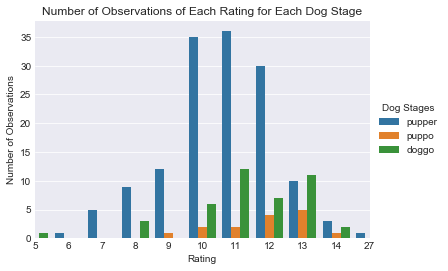

In [69]:
# number of observations of each rating for each dog stage
sns.countplot(x='rating', hue='dog_stage', data=df_master_queried)
plt.xlim([0, 10])
plt.legend(loc='center left', 
           title='Dog Stages', 
           bbox_to_anchor=(1, 0.5), 
           fancybox=True, 
           shadow=True)
plt.xlabel('Rating')
plt.ylabel('Number of Observations')
plt.title('Number of Observations of Each Rating for Each Dog Stage')

Text(0.5,1,'Distribution of Retweet Count for Each Dog Stage')

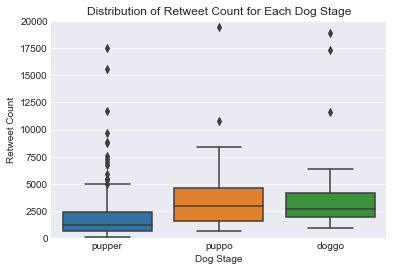

In [70]:
# a boxplot of retweet count for each dog stage
sns.boxplot(x='dog_stage', y='retweet_count', data=df_master_queried)
plt.ylim([0, 20000])
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')
plt.title('Distribution of Retweet Count for Each Dog Stage')

Text(0.5,1,'Distribution of Favorite Count for Each Dog Stage')

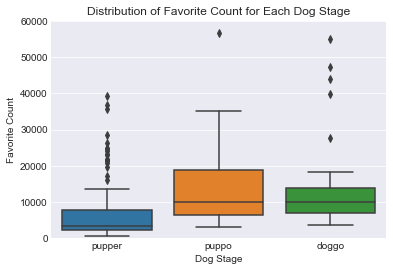

In [71]:
# a boxplot of favorite count for each dog stage
sns.boxplot(x='dog_stage', y='favorite_count', data=df_master_queried)
plt.ylim([0, 60000])
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')
plt.title('Distribution of Favorite Count for Each Dog Stage')

In [72]:
# stats summary for each dog stage
df_master_queried.groupby(['dog_stage'])['retweet_count', 'favorite_count'].describe()

retweet_count                                                   \
                  count         mean          std    min     25%     50%   
dog_stage                                                                  
doggo              42.0  5305.428571  7718.476063  977.0  1960.0  2708.5   
pupper            143.0  2188.699301  2687.039352  101.0   682.0  1245.0   
puppo              15.0  4475.533333  5008.411894  703.0  1566.0  2990.0   

                            favorite_count                              \
               75%      max          count          mean           std   
dog_stage                                                                
doggo      4121.75  41504.0           42.0  15477.500000  17228.378051   
pupper     2416.00  17476.0          143.0   6658.601399   7669.005327   
puppo      4621.00  19425.0           15.0  15122.400000  14402.444469   

                                                       
              min     25%      50%       75%      max  
dog_stage                                              
doggo      3631.0  6845.0  10146.5  13855.25  94435.0  
pupper      680.0  2320.5   3298.0   7802.00  39206.0  
puppo      3239.0  6384.5  10012.0  18809.50  56707.0

Although pupper is the most prevalent, based on the high-level exploration, it seems doggo and puppo possess higher popularity. 

Nonetheless, given the fact that the numbers of observations of both doggo and puppo are much lower than that of pupper, we cannot really say the latter drives less buzz on the internet. Plus there are some ridiculou outliers in the sample, which distorts the distribution.

Let's now see if the reviewers are biased towards certain dog stages.

In [73]:
# create a column that stores binary values
df_master_queried['perfect_10'] = np.where(df_master_queried.eval('rating >= 10'), 1, 0)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [74]:
### Query individual dog stage

df_doggo = df_master_queried.query('dog_stage == "doggo"')

df_puppo = df_master_queried.query('dog_stage == "puppo"')

df_pupper = df_master_queried.query('dog_stage == "pupper"')

In [75]:
### 'Perfect 10' rate for each stage

doggo_perfect_10 = df_doggo.perfect_10.mean()

puppo_perfect_10 = df_puppo.perfect_10.mean()

pupper_perfect_10 = df_pupper.perfect_10.mean()

print(doggo_perfect_10, puppo_perfect_10, pupper_perfect_10)

0.9047619047619048 0.9333333333333333 0.8041958041958042


In [76]:
### 'Perfect 10' rate overall

overall_perfect_10 = df_master_queried.perfect_10.mean()

print(overall_perfect_10)

0.835


At first glance, it seems puppo has a higher chance of getting 'Perfect 10'. Let's build a model to see if we can draw any conclusions

In [77]:
# intercept for modelling
df_master_queried['intercept'] = 1

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [78]:
# dummy columns for modelling
df_master_queried[['doggo', 'pupper', 'puppo']] = pd.get_dummies(df_master_queried['dog_stage'])[['doggo', 'pupper', 'puppo']]

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [79]:
# sanity check
df_master_queried.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 19 to 1062
Data columns (total 25 columns):
tweet_id          200 non-null int64
timestamp         200 non-null object
source            200 non-null object
text              200 non-null object
expanded_urls     200 non-null object
rating            200 non-null int64
name              122 non-null object
dog_stage         200 non-null object
jpg_url           200 non-null object
p1                200 non-null object
p1_conf           200 non-null float64
p1_dog            200 non-null bool
p2                200 non-null object
p2_conf           200 non-null float64
p2_dog            200 non-null bool
p3                200 non-null object
p3_conf           200 non-null float64
p3_dog            200 non-null bool
favorite_count    200 non-null int64
retweet_count     200 non-null int64
perfect_10        200 non-null int64
intercept         200 non-null int64
doggo             200 non-null uint8
pupper            200 non-nul

In [80]:
### Logistic Regression - Peerfect 10 as response variable

logit_mod = sm.Logit(df_master_queried['perfect_10'], 
                    df_master_queried[['intercept', 'doggo', 'pupper']])

logit_mod_results = logit_mod.fit()

logit_mod_results.summary()

Optimization terminated successfully.
         Current function value: 0.438002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             perfect_10   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                 0.02203
Time:                        22:53:20   Log-Likelihood:                -87.600
converged:                       True   LL-Null:                       -89.574
                                        LLR p-value:                    0.1390
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6391      1.035      2.550      0.011       0.610       4.668
doggo         -0.3878      1.161     -0.334      0.738      -2.663       1.888
pupper        -1.2263      1.056     -1.161      0.246      -3.297       0.844
==============================================================================
"""

Both the doggo and pupper coefficients are associated with a p-value higher than 0.05; which suggests the numbers are not conventionally and statistically significant.

Are doggo and pupper any different from each other?

Let's try to validate it by boostrapping.

In [81]:
### The 'Perfect 10' rate for doggo and pupper

dog_pup_sum = df_doggo.perfect_10.sum() + df_pupper.perfect_10.sum()

dog_pup_mean = dog_pup_sum / (len(df_doggo) + len(df_pupper))
                              
print(dog_pup_mean)

0.827027027027027


In [82]:
### Use the binomial function to perform simulation

sim_doggo_perfect_10 = np.random.binomial(len(df_doggo), dog_pup_mean, 10000) / len(df_doggo)

sim_pupper_perfect_10 = np.random.binomial(len(df_pupper), dog_pup_mean, 10000) / len(df_pupper)

p_diffs = sim_doggo_perfect_10 - sim_pupper_perfect_10

(array([   3.,   18.,  167.,  623., 1778., 2919., 2752., 1390.,  319.,
          31.]),
 array([-0.30685981, -0.253663  , -0.2004662 , -0.1472694 , -0.09407259,
        -0.04087579,  0.01232101,  0.06551782,  0.11871462,  0.17191142,
         0.22510823]),
 <a list of 10 Patch objects>)

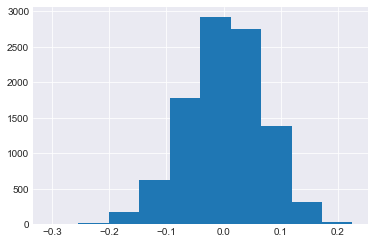

In [83]:
# sampling distribution of the bootstrap replicates under null
plt.hist(p_diffs)

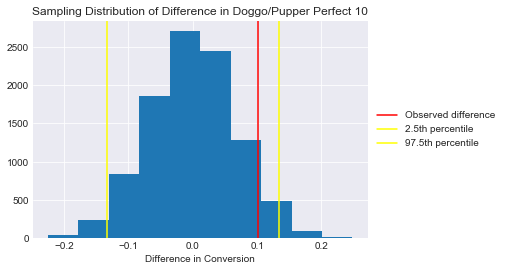

In [84]:
### sampling distribution under null compared to emperical value

null_vals = np.random.normal(0, p_diffs.std(), len(p_diffs))

obs_diff = doggo_perfect_10 - pupper_perfect_10

ptile_low = np.percentile(null_vals, 2.5)

ptile_high = np.percentile(null_vals, 97.5)

plt.hist(null_vals)
plt.axvline(obs_diff, color='red', label='Observed difference')
plt.axvline(ptile_low, color='yellow', label='2.5th percentile')
plt.axvline(ptile_high, color='yellow', label='97.5th percentile')
plt.title('Sampling Distribution of Difference in Doggo/Pupper Perfect 10')
plt.xlabel('Difference in Conversion')
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5), 
           fancybox=True, 
           shadow=True)

In [85]:
### P-value

p_val = (null_vals > obs_diff).mean()

print('p-value =', p_val)

p-value = 0.0692


The p-value is greater than 0.05, which implies that the results are not conventionally and statistically significant.

In [86]:
### T-statistic and P-value

t_stat, p_val = st.ttest_ind(df_doggo.perfect_10, df_pupper.perfect_10, equal_var=False)

print('t-statistic = %6.3f, p-value = %6.4f' % (t_stat, p_val))

t-statistic =  1.775, p-value = 0.0794


Based on the t-test, we also stick with the null.